## Машинное обучение, ВМК МГУ

## Практическое задание 1

### Общая информация
Дата выдачи: 9 февраля 2019 г.

Дедлайн: 9 марта 2019 г.

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии
- реализуете логистическую регрессию и её обучение градиентным спуском
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса).

Неэффективная реализация кода может негативно отразиться на оценке.

In [1]:
%pylab inline
import pandas as pd
import numpy as np

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

В этой части мы кратко познакомимся с линейной регрессией.

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3.

In [2]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=318)

/home/zhalgas/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [3]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [4]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
print(data.data[:10])

[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]
 [-0.09269548 -0.04464164 -0.04069594 -0.01944209 -0.06899065 -0.07928784
   0.04127682 -0.0763945  -0.04118039 -0.09634616]
 [-0.04547248  0.05068012 -0.04716281 -0.01599922 -0.04009564 -0.02480001
   0.00077881 -0.03949338 -0.06291295 -0.03835666]
 [ 0.06350368  0.05068012 -0.00189471  0.06662967  0.09061988  0.10891438
   0.02286863  0.01770335 -0.03581673  0.00306441]


In [6]:
stats.describe(data.target[:])

DescribeResult(nobs=442, minmax=(25.0, 346.0), mean=152.13348416289594, variance=5943.331347923785, skewness=0.43906639932477265, kurtosis=-0.8866436055681386)

In [7]:
np.unique(data.data[:, 1]).shape

(2,)

Видимо 0.05 для мужского, -0.04 для женского

__Задание 1.__ Обучение линейной регрессии.

Обучите линейную регрессию с $L_1$ (Lasso, http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) и $L_2$ (Ridge, http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [8]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [9]:
from functools import reduce

In [10]:
import matplotlib.pyplot as plt

In [11]:
def coefs0_to_alpha(a):
    clf = Lasso(alpha=a)
    clf.fit(X_train, y_train)
    return reduce(lambda x, y: x + (1 if abs(y) < 0.001 else 0), clf.coef_, 0)

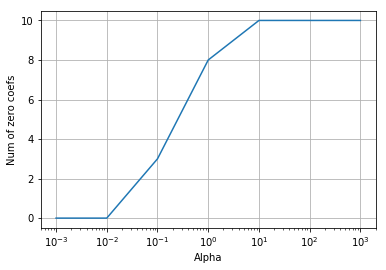

In [12]:
a = [10**i for i in range(-3, 4)]
plt.plot(a, list(map(coefs0_to_alpha, a)))
plt.xscale("log")
plt.grid(True)
plt.xlabel("Alpha")
plt.ylabel("Num of zero coefs")
plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [14]:
clf = Ridge()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("RMSE: \t", mean_squared_error(y_test, y_pred))
print("MAE: \t", mean_absolute_error(y_test, y_pred))
print("R2: \t", r2_score(y_test, y_pred))

RMSE: 	 3319.405217723009
MAE: 	 47.7824170753989
R2: 	 0.41154718374963595


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [16]:
params = {
    "alpha" : [10**i for i in range(-3, 4)]
}

In [17]:
X = data.data
y = data.target

In [18]:
kf = KFold(n_splits=10)

In [19]:
metrics = ('neg_mean_absolute_error',
          'neg_mean_squared_error',
          'r2'
)

In [20]:
clf = GridSearchCV(Ridge(), params, scoring=metrics, refit='r2', cv=kf.split(X))

In [21]:
clf.fit(X, y)

/home/zhalgas/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fc7af478c50>,
       error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit='r2', return_train_score='warn',
       scoring=('neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'),
       verbose=0)

In [22]:
print(clf.cv_results_)

{'mean_fit_time': array([0.00056953, 0.00050735, 0.00043743, 0.00042622, 0.00043004,
       0.0004106 , 0.0004343 ]), 'std_fit_time': array([1.67653117e-04, 4.83898098e-05, 2.42728498e-05, 2.52316367e-05,
       6.39418049e-05, 2.13673598e-05, 8.55989241e-05]), 'mean_score_time': array([0.00062706, 0.00070145, 0.0006031 , 0.00055513, 0.00055225,
       0.000544  , 0.00057118]), 'std_score_time': array([5.44379581e-05, 1.43324965e-04, 3.53226921e-05, 3.02504606e-05,
       2.35460649e-05, 1.11242389e-05, 3.53826426e-05]), 'param_alpha': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.001}, {'alpha': 0.01}, {'alpha': 0.1}, {'alpha': 1}, {'alpha': 10}, {'alpha': 100}, {'alpha': 1000}], 'split0_test_neg_mean_absolute_error': array([-41.06669238, -41.53303858, -42.21428642, -45.78291192,
       -57.03221478, -62.76918402, -63.54974385]), 'spli

/home/zhalgas/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_neg_mean_absolute_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


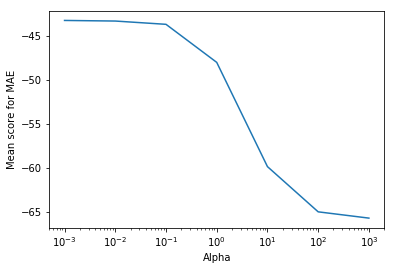

In [23]:
plt.plot(params['alpha'], clf.cv_results_['mean_train_neg_mean_absolute_error'])
plt.xscale('log')
plt.ylabel("Mean score for MAE")
plt.xlabel("Alpha")

plt.show()

/home/zhalgas/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_neg_mean_squared_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


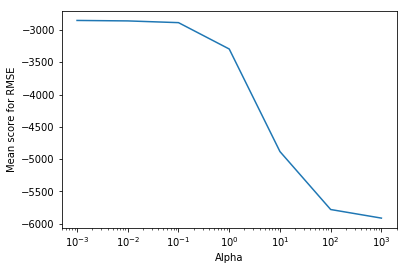

In [24]:
plt.plot(params['alpha'], clf.cv_results_['mean_train_neg_mean_squared_error'])
plt.xscale('log')
plt.ylabel("Mean score for RMSE")
plt.xlabel("Alpha")

plt.show()

/home/zhalgas/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_r2'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


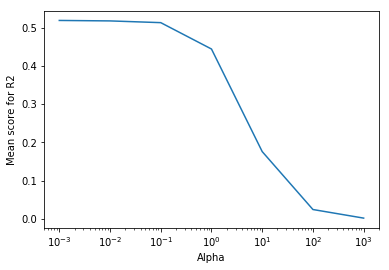

In [25]:
plt.plot(params['alpha'], clf.cv_results_['mean_train_r2'])
plt.xscale('log')
plt.ylabel("Mean score for R2")
plt.xlabel("Alpha")

plt.show()

Умножаю на -1, потому что все значения отрицательны. Видимо это нужно для того, чтобы лучший скор брался по умолчанию как максимум из всех скоров

In [26]:
print("Лучший результат, согласно метрике R2 на тесте: \t", clf.best_score_)
print("Лучший результат, согласно метрике MAE на тесте: \t",
          -1 * np.max(clf.cv_results_['mean_test_neg_mean_absolute_error']))
print("Лучший результат, согласно метрике RMSE на тесте: \t",
          -1 * np.max(clf.cv_results_['mean_test_neg_mean_squared_error']))

Лучший результат, согласно метрике R2 на тесте: 	 0.4629731248280685
Лучший результат, согласно метрике MAE на тесте: 	 44.18390933228846
Лучший результат, согласно метрике RMSE на тесте: 	 2996.125947205788


Можно заметить, что все метрики дали лучшие показатели.

__Задание 2.__ Поиск объектов-выбросов

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

In [27]:
from sklearn.model_selection import cross_val_predict

In [28]:
clf = Ridge(alpha=0.1)
y_pred = cross_val_predict(clf, X_train, y_train, cv=kf.split(X_train))

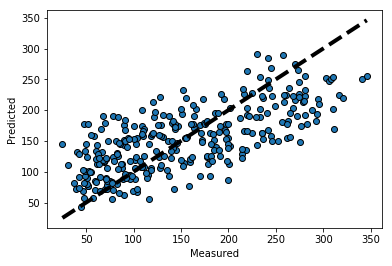

In [29]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

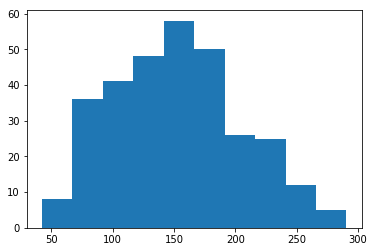

In [30]:
plt.hist(y_pred)
plt.show()

In [31]:
print("На обучающей выборке R2 метрика равна: \t\t", r2_score(y_train, y_pred))
print("На обучающей выборке RMSE метрика равна: \t", mean_squared_error(y_train, y_pred))
print("На обучающей выборке MAE метрика равна: \t", mean_absolute_error(y_train, y_pred))

На обучающей выборке R2 метрика равна: 		 0.49601848630080214
На обучающей выборке RMSE метрика равна: 	 3051.155399990245
На обучающей выборке MAE метрика равна: 	 45.33129060451274


Можно заметить, что большинство предиктов находятся в районе 140-160

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

Я буду считать выбросами те объекты, для которых разница между предиктом и настоящим значением больше, чем 30% от размаха всех значений.

In [32]:
max_err = (y_train.max() - y_train.min()) * 0.3
X_new = []
y_new = []
for i in range(X_train.shape[0]):
    if not (abs(y_pred[i] - y_train[i]) > max_err):
        X_new.append(X_train[i])
        y_new.append(y_train[i])
X_new = np.array(X_new)
y_new = np.array(y_new)

In [33]:
print("Количество объектов-выбросов: ", X_train.shape[0] - X_new.shape[0])

Количество объектов-выбросов:  23


In [34]:
clf.fit(X_new, y_new)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [35]:
y_pred = clf.predict(X_test)

In [36]:
print("На тестовой выборке R2 метрика, для классификатора без выбросов, равна: \t", r2_score(y_test, y_pred))
print("На тестовой выборке RMSE метрика, для классификатора без выбросов, равна: \t", mean_squared_error(y_test, y_pred))
print("На тестовой выборке MAE метрика, для классификатора без выбросов, равна: \t", mean_absolute_error(y_test, y_pred))

На тестовой выборке R2 метрика, для классификатора без выбросов, равна: 	 0.47407483207851964
На тестовой выборке RMSE метрика, для классификатора без выбросов, равна: 	 2966.692822806814
На тестовой выборке MAE метрика, для классификатора без выбросов, равна: 	 43.58080253122254


In [37]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [38]:
print("На тестовой выборке R2 метрика, для классификатора с выбросами равна: \t\t", r2_score(y_test, y_pred))
print("На тестовой выборке RMSE метрика, для классификатора с выбросами равна: \t", mean_squared_error(y_test, y_pred))
print("На тестовой выборке MAE метрика, для классификатора с выбросами равна: \t\t", mean_absolute_error(y_test, y_pred))

На тестовой выборке R2 метрика, для классификатора с выбросами равна: 		 0.4822640116723962
На тестовой выборке RMSE метрика, для классификатора с выбросами равна: 	 2920.4984556084432
На тестовой выборке MAE метрика, для классификатора с выбросами равна: 		 43.11894259524007


Можно заметить, что ошибка не сильно изменилась. Скорее всего, дело в том, что линейная зависимость в данных не сильно выявляется, поэтому классификатор будет давать большую ошибку, несмотря на наличие выбросов

## Часть 2. Логистическая регрессия

В этой части мы будем реализовывать один из самых простых бинарных классификаторов — логистическую регрессию и её обучение с помощью обычного (полного) и стохастического градиентных спусков.

Если кратко, то обучение логистической регрессии с $L_2$-регуляризацией можно записать следующим образом:

$$
Q(w, X) = \frac{1}{l} \sum_{i=1}^{l} \log (1 + \exp(- y_i \langle w, x_i \rangle )) + \frac{\lambda_2}{2} \lVert w \rVert _2^2 \to \min_w
$$

Считаем, что $y_i \in \{-1, +1\}$, а нулевым признаком сделан единичный (то есть $w_0$ соответствует свободному члену). Искать $w$ будем с помощью градиентного спуска:

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla_w Q(w, X)
$$

В случае полного градиентного спуска $\nabla_w Q(w, X)$ считается напрямую (как есть, то есть, используя все объекты выборки). В случае стохастического градиентного спуска $\nabla_w Q(w, X) \approx \nabla_w q_{i_k} (w)$, где $i_k$ — случайно выбранный номер слагаемого из функционала (регуляризатор можно внести в сумму, предварительно умножив и разделив на $l$). Длину шага $\alpha > 0$ в рамках данного задания предлагается брать равной некоторой малой константе.

Градиент по объекту $x_i$ считается по следующей формуле:

$$
\nabla_w Q(w, x_i) = - \frac{y_i x_i}{1 + \exp(y_i \langle w, x_i \rangle)} + \lambda_2 w
$$

На самом деле неправильно регуляризировать свободный член $w_0$ (то есть при добавлении градиента для $w_0$ не надо учитывать слагаемое с $\lambda_2$). Но в рамках этого задания мы не обращаем на это внимания и работаем со всеми вектором весов одинаково. 

В качестве критерия останова необходимо использовать (одновременно):
- проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$) — параметр tolerance
- достижение максимального числа итераций (например, 10000) — параметр max\_iter.

Инициализировать веса можно случайным образом или нулевым вектором.

Вероятность принадлежности объекта $x$ классу $+1$ вычисляется следующим образом:

$$
P(y = +1 | x) = \frac{1}{1 + \exp(- \langle w, x \rangle )}
$$

Не забывайте, что матрицу объекты-признаки $X$ необходимо предварительно нормировать (то есть привести каждый признак к одному и тому же масштабу одним из 2 способов, разобранных на лекциях). Для этого можно воспользоваться StandardScaler или сделать это вручную.

В логистической регрессии также можно использовать $L_1$-регуляризацию. Тогда в функцию потерь добавится слагаемое $\lambda_1 \lVert w \rVert _1$. В формуле для вычисления градиента фукнции потерь по вектору коэффициентов это слагаемое будет соответствовать $\lambda_1 sgn(w)$, где $sgn$ — вычисление знака числа, применяемое к вектору коэффициентов поэлементо.

__Задание 1.__ Реализация обучения и применения логистической регресии c $L_2$-регуляризацией. 

Используйте для этого указанные ниже прототипы. Для эффективности все вычисления производите в векторизованной форме без циклов (кроме самих итераций градиентного спуска). Сгенерируйте с помощью функции make\_classification из модуля sklearn.datasets небольшую выборку для тестирования и исследования (выборка не должна быть слишком простой для классификации; также не забудьте проверить, что метки объектов из необходимого нам множества). Постройте следующие графики (для полного и стохастического градиентного спуска на одном графике):
- функции потерь от номера итерации обучения
- затраченного времени от номера итерации обучения

Возьмите параметр регуляризации $\lambda_2=1$, точность $tolerance=10^{-6}$, максимальное число итераций $max\_iter=1000$. Подберите оптимальную на ваш взгляд величину шага градиентного спуска. 

Сделайте выводы о том, чем различается на практике обучение с помощью стохастического градиентного спуска по сравнению с полным градиентным спуском.

В этом задании не обращайте внимания на $\lambda_1$, соответствующий $L_1$-регуляризации.

Для численной устойчивости вам могут быть полезны функции: scipy.special.expit и numpy.logaddexp.

In [39]:
from scipy.special import expit
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
import time

In [118]:
class LogReg(BaseEstimator):
    def __init__(self, lambda_1=0.0, lambda_2=1.0, gd_type='stochastic', 
                 tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-3):
        """
        lambda_1: L1 regularization param
        lambda_2: L2 regularization param
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        alpha: learning rate
        """
        self.lambda_1 = lambda_1
        self.lambda_2 = lambda_2
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.alpha = alpha
        self.w = w0
        self.loss_history = None
        self.time = None

    ###Я создал вспомогательную функцию, так как calc_loss считается на всей выборке, поэтому
    ###итерация стохастического гр. спуска будет работать дольше чем должна
    def fit_w_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []
        if self.w is None:
            self.w = np.random.rand(X.shape[1])
        
        for _ in range(self.max_iter):
            if self.gd_type == 'stochastic':
                i = np.random.randint(0, X.shape[0])
                grad = self.calc_gradient(X[i], y[i])
            else:
                grad = self.calc_gradient(X, y)
            w_prev = self.w
            self.w = self.w - self.alpha * grad
            self.loss_history.append(self.calc_loss(X, y))
            if np.sqrt(np.dot(self.w - w_prev, self.w - w_prev)) < self.tolerance:
                break
        return self

    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.time = []
        time_start = time.time()
        if self.w is None:
            self.w = np.random.rand(X.shape[1])
        
        for _ in range(self.max_iter):
            if self.gd_type == 'stochastic':
                i = np.random.randint(0, X.shape[0])
                grad = self.calc_gradient(X[i], y[i])
            else:
                grad = self.calc_gradient(X, y)
            w_prev = self.w
            self.w = self.w - self.alpha * grad
            self.time.append(time.time() - time_start)
            if np.sqrt(np.dot(self.w - w_prev, self.w - w_prev)) < self.tolerance:
                break
        return self
    
    def predict_proba(self, X):
        """
        X: np.array of shape (l, d)
        ---
        output: np.array of shape (l, 2) where
        first column has probabilities of -1
        second column has probabilities of +1
        """
        if self.w is None:
            raise Exception('Not trained yet')
        
        prob = expit(np.dot(X, self.w))
        return np.transpose(np.array([1 - prob, prob]))
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        ###Так как np.transpose не работает, если количество строк равно 1
        if (self.gd_type != 'stochastic'):
            grad = -np.dot(np.transpose(X), np.multiply(y, expit(-np.multiply(y, np.dot(X, self.w))))) / X.shape[0]
        else:
            grad = -(y * expit(-y * np.dot(X, self.w))) * X
        grad = grad + self.lambda_1 * np.sign(self.w) + self.lambda_2 * self.w
        return grad

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        loss = -np.sum(np.log(expit(np.multiply(y, np.dot(X, self.w))))) / X.shape[0] +\
            self.lambda_1 * np.sqrt(np.dot(self.w, self.w)) +\
            self.lambda_2 * np.dot(self.w, self.w) / 2
        return loss

In [41]:
from sklearn.datasets import make_classification

In [71]:
X, y = make_classification(n_samples=100000, n_features=10, n_classes=2, n_redundant=0)

In [72]:
X

array([[ 0.47703912, -2.00267876,  0.9215963 , ...,  0.52903409,
        -0.52125678, -1.11964317],
       [-0.12355014,  0.02458357, -1.22573838, ...,  2.17620012,
        -0.95801454, -1.57900557],
       [ 0.47383094, -1.15207618,  1.17509157, ..., -1.40038309,
         0.60418162, -0.04890177],
       ...,
       [ 0.14541186,  1.23913945, -0.59270271, ...,  1.2422329 ,
        -1.20402055,  0.70498669],
       [-1.40676733,  0.16143226,  1.88840011, ..., -1.73552453,
        -0.26317472,  1.0938114 ],
       [-1.30155067, -0.82439909,  0.98568238, ...,  1.90234947,
         1.04327208, -1.26864131]])

In [73]:
scaler = StandardScaler()

In [74]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [75]:
X = scaler.transform(X)

In [76]:
X

array([[ 0.48396232, -2.00439389,  0.91707241, ...,  0.53792922,
        -0.43080192, -1.11479353],
       [-0.11949823,  0.02587673, -1.23507763, ...,  2.19062645,
        -0.79302023, -1.57274128],
       [ 0.4807388 , -1.15252908,  1.17113613, ..., -1.39796695,
         0.50256307, -0.0473496 ],
       ...,
       [ 0.15074962,  1.24223491, -0.60062239, ...,  1.25352296,
        -0.99704152,  0.70421719],
       [-1.40885019,  0.1629285 ,  1.88604426, ..., -1.7342338 ,
        -0.21676554,  1.09184447],
       [-1.30313051, -0.82436575,  0.9813022 , ...,  1.9158562 ,
         0.86671597, -1.26333282]])

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=300)

In [114]:
clf = LogReg(lambda_2=1.0, max_iter=100, tolerance=1e-10, alpha=0.8, gd_type='full')

In [102]:
clf.fit(X_train, y_train)

LogReg(alpha=0.8, gd_type='full', lambda_1=0.0, lambda_2=1.0, max_iter=100,
    tolerance=1e-10, w0=None)

In [103]:
y_pred = [0 if i[0] > i[1] else 1 for i in clf.predict_proba(X_test)]

In [104]:
print("R2 on full: \t", r2_score(y_test, y_pred))
print("RMSE on full: \t", mean_squared_error(y_test, y_pred))
print("MAE on full: \t", mean_absolute_error(y_test, y_pred))

R2 on full: 	 0.7091892968736329
RMSE on full: 	 0.0727
MAE on full: 	 0.0727


In [105]:
clf_s = LogReg(lambda_2=1.0, max_iter=100, tolerance=1e-10, alpha=0.1, gd_type='stochastic')

In [106]:
clf_s.fit(X_train, y_train)

LogReg(alpha=0.1, gd_type='stochastic', lambda_1=0.0, lambda_2=1.0,
    max_iter=100, tolerance=1e-10, w0=None)

In [107]:
y_pred = [0 if i[0] > i[1] else 1 for i in clf_s.predict_proba(X_test)]

In [108]:
print("R2 on stochastic: \t", r2_score(y_test, y_pred))
print("RMSE on stochastic: \t", mean_squared_error(y_test, y_pred))
print("MAE on stochastic: \t", mean_absolute_error(y_test, y_pred))

R2 on stochastic: 	 -0.09257354489566794
RMSE on stochastic: 	 0.27313333333333334
MAE on stochastic: 	 0.27313333333333334


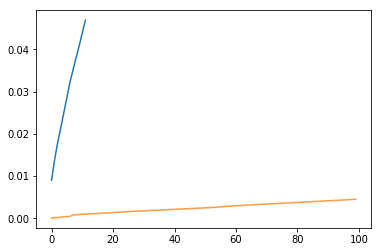

In [109]:
plt.plot(clf.time)
plt.plot(clf_s.time, alpha=0.8)
plt.show()

In [110]:
clf.fit_w_loss(X_train, y_train)
clf_s.fit_w_loss(X_train, y_train)

LogReg(alpha=0.1, gd_type='stochastic', lambda_1=0.0, lambda_2=1.0,
    max_iter=100, tolerance=1e-10, w0=None)

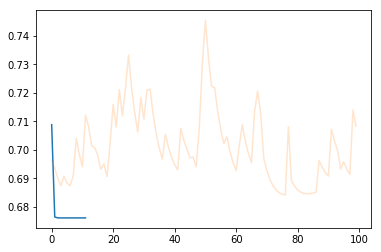

In [117]:
plt.plot(clf.loss_history)
plt.plot(clf_s.loss_history, alpha=0.2)
plt.show()

__Выводы:__ ...

Можно заметить (по скорости роста на графике времени), что одна итерация фул гр. спуска занимает гораздо больше времени, но весь процесс сходится довольно быстро, поэтому таких итераций требуется около 10. В то же время, стох. гр. спуск использует все итерации, от того и времени занимает дольше.

Сравним скорость обучения для 'Full' и для 'Stochastic':

In [119]:
clf = LogReg(lambda_2=1.0, max_iter=10000, tolerance=1e-7, alpha=0.1, gd_type='full')

In [120]:
%%timeit
clf.fit(X, y)

3.91 ms ± 26 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [121]:
clf_s = LogReg(lambda_2=1.0, max_iter=10000, tolerance=1e-7, alpha=0.1, gd_type='stochastic')

In [122]:
%%timeit
clf_s.fit(X, y)

301 ms ± 20.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Можно заметить, что в среднем фул гр. спуск обучается в несколько раз быстрее. Думаю стоит брать размер батча для стох. гр. спуска не единица, а чуть больше. Так же стоит изменять длинну прыжка на каждом шаге. Тогда, возможно, стох. гр. спуск будет работать быстрее чем фул.

__Задание 2.__ Обучение логистической регрессии на реальных данных и оценка качества классификации.

Полезные функции и классы из scikit-learn для этого задания: confusion_matrix, precision_recall_curve, average_precision_score, train_test_split, StandardScaler, roc-curve, roc_auc_score.

Возьмём данные конкурса [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [123]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

In [124]:
data.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,2,2,5,1,0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
9,1,1,7,0,0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
13,5,4,9,1,0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
16,0,1,2,0,0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,2,0,1,0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0


Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.

In [125]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

/home/zhalgas/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/zhalgas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


Не забудьте отнормировать признаки (можно воспользоваться StandardScaler или сделать это вручную). Пока не будем обращать внимание на то, что некоторые признаки категориальные (этим мы займёмся позже).

In [126]:
clf = LogReg(lambda_1=0.2, lambda_2=0.8, gd_type='full', tolerance=1e-6, max_iter=1000, alpha=0.01)
clf.fit(X_train, y_train)

LogReg(alpha=0.01, gd_type='full', lambda_1=0.2, lambda_2=0.8, max_iter=1000,
    tolerance=1e-06, w0=None)

Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

In [127]:
y_pred = [0 if i[0] > i[1] else 1 for i in clf.predict_proba(X_test)]

Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

In [128]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score

In [129]:
tmp = clf.predict_proba(X_test)[:, 1]

In [130]:
fpr, tpr, thresholds = roc_curve(y_test, tmp)

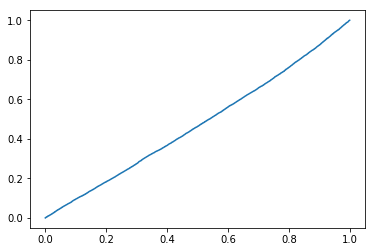

In [131]:
plt.plot(fpr, tpr)
plt.show()

In [132]:
roc_auc_score(y_test, tmp)

0.4733302836159561

In [133]:
precision, recall, threshold = precision_recall_curve(y_test, tmp)

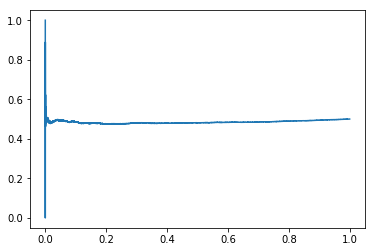

In [134]:
plt.plot(recall, precision)
plt.show()

Предположим, что наш алгоритм должен обеспечивать полноту не менее 0.7. Какому порогу бинаризации вероятностей это будет соответствовать? Какую точность (precision) мы получим? Постройте матрицу ошибок для данного порога. Что вы можете сказать о таком алгоритме? (В свободной форме)

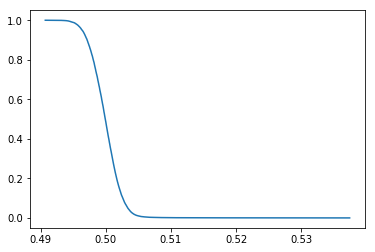

In [135]:
plt.plot(threshold, recall[:-1])
plt.show()

Согласно графику зависимости полноты от порога вхождения в + класс, нам стоит выбрать порог чуть меньше 0.5

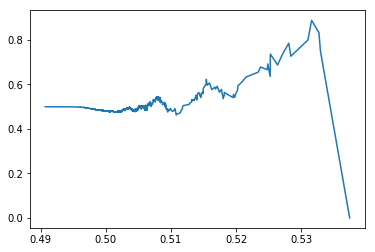

In [136]:
plt.plot(threshold, precision[:-1])
plt.show()

Примерное значение точности будет равно 0.5

In [138]:
y_pred = [1 if i[1] > 0.497 else 0 for i in clf.predict_proba(X_test)]

In [140]:
from sklearn.metrics import confusion_matrix

In [141]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

3609 46385 4511 45495


In [143]:
recall = tp / (tp + fn)
print(recall)

0.9097908251009879


Этот алгоритм плохой. Но подойдет для бухгалтерских контор

__Задание 3.__ Изучение влияния регуляризатора на процесс обучения

Проверьте на практике, как влияет регуляризатор на процесс обучения (убывание функции потерь на обучающей и отложенной выборках). Чтобы считать функцию потерь на отложенной выборке после каждой итерации, запускайте процесс обучения логистической регрессии с параметром $max\_iter=1$ и $w^{(0)}$, полученным на предыдущей итерации. Постройте два графика: на одном из них логистическая регрессия с коэффициентом регуляризации, равным 0, а на другом с некоторым разумным значением. На каждом графике одновременно должна быть и функция потерь для обучающей, и для тестовой выборки. Не забудьте сделать одинаковыми оси обоих графиков. Какие выводы вы можете сделать?

In [144]:
clf_wo_reg = LogReg(lambda_1=0, lambda_2=0, gd_type='full', max_iter=1, tolerance=0.0000001)
clf_w_reg = LogReg(lambda_1=0, lambda_2=0.8, gd_type='full', max_iter=1, tolerance=0.0000001)

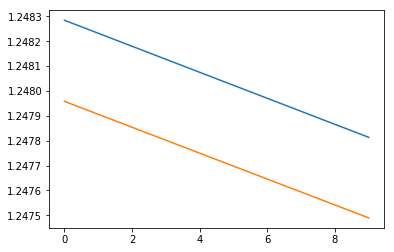

In [145]:
wo_reg_train = []
wo_reg_test = []
for _ in range(10):
    clf_wo_reg.fit(X_train, y_train)
    wo_reg_train.append(clf_wo_reg.calc_loss(X_train, y_train))
    wo_reg_test.append(clf_wo_reg.calc_loss(X_test, y_test))
plt.plot(wo_reg_train)
plt.plot(wo_reg_test)
plt.show()

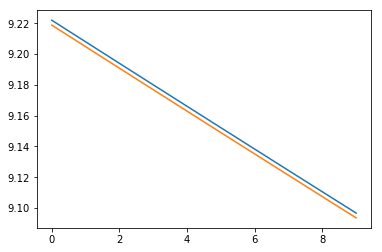

In [146]:
w_reg_train = []
w_reg_test = []
for _ in range(10):
    clf_w_reg.fit(X_train, y_train)
    w_reg_train.append(clf_w_reg.calc_loss(X_train, y_train))
    w_reg_test.append(clf_w_reg.calc_loss(X_test, y_test))
plt.plot(w_reg_train)
plt.plot(w_reg_test)
plt.show()

Можно заметить, что с появлением регуляризации график по оси oY сместился вверх (т.к. добавляется еще и квадрат нормы вектора весов). Так же можно заметить, что функция потерь теперь имеет более высокий угол наклона.

## Часть 3. Метод опорных векторов

__Задание 1.__ Обучение и применение метода опорных векторов.

Обучите метод опорных векторов (в этот раз воспользуйтесь готовой реализацией LinearSVC из sklearn). Используйте уже загруженные и обработанные в предыдущей части данные.

In [147]:
from sklearn.svm import LinearSVC

In [148]:
clf = LinearSVC()

In [149]:
clf.fit(X_train, y_train)

/home/zhalgas/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

На той же тестовой части посчитайте все те же метрики. Что вы можете сказать о полученных результатах?

In [150]:
y_pred = clf.predict(X_test)

In [151]:
print("R2 :\t", r2_score(y_test, y_pred))
print("RMSE :\t", mean_squared_error(y_test, y_pred))
print("MAE :\t", mean_absolute_error(y_test, y_pred))

R2 :	 -0.6494800237525127
RMSE :	 0.41237
MAE :	 0.41237


Результаты не очень, видимо данные не очень скорелированы линейно

В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками, обучите на нём метод опорных векторов с линейным ядром. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром, так как только в нём есть информация об опорных векторах.

In [152]:
from sklearn.datasets import make_classification

In [153]:
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_redundant=0)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=300)

In [155]:
from sklearn.svm import SVC

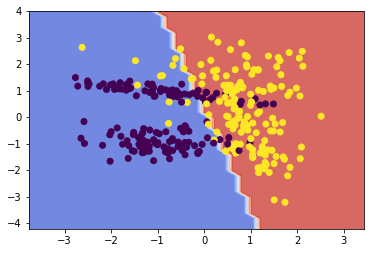

In [156]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# generate grid for plotting
h = 0.2
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))

# create decision boundary plot
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
contourf(xx,yy,Z,cmap=plt.cm.coolwarm, alpha=0.8)
scatter(X_train[:,0], X_train[:,1],c=y_train)
show()

In [157]:
clf.support_vectors_

array([[-0.65698373,  0.78583715],
       [-0.63278514,  0.86525024],
       [-0.56809906,  0.76968068],
       [-0.67728326,  1.02995173],
       [ 0.98872735, -0.96169523],
       [-0.7552918 ,  0.9934675 ],
       [ 0.80203729,  0.59829243],
       [ 0.04240169,  0.93726641],
       [-0.04116666, -1.02370399],
       [ 1.09861524,  0.69354997],
       [-0.41704472,  0.87501388],
       [ 0.34007791, -0.8458763 ],
       [ 0.12774074,  0.65633453],
       [ 0.77924808,  0.48355025],
       [ 0.20622177, -0.97480552],
       [-0.23563569,  0.90767083],
       [ 0.07230598, -0.7792417 ],
       [ 1.32036742,  0.5011873 ],
       [-0.38996975, -0.37609672],
       [-0.57055151,  0.9263926 ],
       [-0.5356082 ,  0.87870828],
       [-0.13881812,  0.78584084],
       [ 0.05355828,  0.93721644],
       [-0.13426888, -1.33343047],
       [ 0.45867173,  0.86241627],
       [-0.1010448 , -1.29180503],
       [-0.20238477, -1.07421235],
       [ 1.49193232,  0.49801586],
       [-0.60487869,

## Часть 4. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Задание 1.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было ранее). Измерьте время, потребовавшееся на обучение модели.

In [158]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

In [159]:
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 1000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 1000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

data.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
783681,0,2,0,1,0,1,0,0,0,0,...,3,1,5,9,0,0,1,0,1,0
636497,0,1,6,1,0,0,1,0,0,0,...,5,2,1,10,0,1,1,0,1,0
659813,2,1,3,1,0,1,0,0,0,0,...,3,1,1,8,0,1,1,0,0,0
334742,0,1,10,0,0,1,0,0,0,0,...,7,2,2,11,0,0,1,1,0,0
1156570,0,1,9,0,6,1,0,0,0,0,...,8,1,1,8,0,1,0,0,1,0


In [160]:
from sklearn.preprocessing import OneHotEncoder

In [161]:
enc = OneHotEncoder(categories='auto')

In [162]:
enc.fit(data)

OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [163]:
data = enc.transform(data).toarray()

In [164]:
data.shape

(2000, 3944)

In [165]:
scale = StandardScaler()

In [166]:
scale.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [167]:
data = scale.transform(data)

In [168]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=301)

In [169]:
clf = LogReg(gd_type='full')

In [170]:
%%timeit
clf.fit(X_train, y_train)

The slowest run took 1024.95 times longer than the fastest. This could mean that an intermediate result is being cached.
3 s ± 1.91 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [171]:
y_pred = [0 if i[0] > i[1] else 1 for i in clf.predict_proba(X_test)]

In [172]:
print("R2:\t", r2_score(y_test, y_pred))
print("RMSE:\t", mean_squared_error(y_test, y_pred))
print("MAE:\t", mean_absolute_error(y_test, y_pred))

R2:	 -0.9360077440309764
RMSE:	 0.484
MAE:	 0.484


Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

__Задание 2.__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Обучите логистическую регрессию и посмотрите на качество модели на тестовом множестве. Сравните время обучения с предыдущим экспериментов. Заметили ли вы что-то интересное?

In [173]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

In [174]:
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 1000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 1000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

data.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
783681,0,2,0,1,0,1,0,0,0,0,...,3,1,5,9,0,0,1,0,1,0
636497,0,1,6,1,0,0,1,0,0,0,...,5,2,1,10,0,1,1,0,1,0
659813,2,1,3,1,0,1,0,0,0,0,...,3,1,1,8,0,1,1,0,0,0
334742,0,1,10,0,0,1,0,0,0,0,...,7,2,2,11,0,0,1,1,0,0
1156570,0,1,9,0,6,1,0,0,0,0,...,8,1,1,8,0,1,0,0,1,0


In [175]:
def encode(col, tar):
    for i in range(col.shape[0]):
        encode.var_dict.setdefault(col[i], [0, 0])[1] += 1
        if tar[i] == 1:
            encode.var_dict[col[i]][0] += 1
    if len(encode.var_dict) > col.shape[0] * 0.01: #переменная категориальная, если в ней меньше 1-го процента уник
        return False
    else:
        for key in encode.var_dict:
            encode.var_dict[key] = encode.var_dict[key][0] / encode.var_dict[key][1]
        return True

In [176]:
for i in data:
    encode.var_dict = {}
    flag = encode(data[i].values, target)
    if flag:
        data[i] = data[i].map(encode.var_dict)

In [177]:
data.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
783681,0.470588,0.500000,0.597561,0.509302,0.479436,0.419718,0.475645,0.491597,0.494539,0.5,...,0.495614,0.497667,0.409357,0.490654,0.506059,0.507714,0.501370,0.50599,0.505525,0.505931
636497,0.470588,0.489138,0.527197,0.509302,0.479436,0.544186,0.556291,0.491597,0.494539,0.5,...,0.510929,0.471774,0.458204,0.508475,0.506059,0.495726,0.501370,0.50599,0.505525,0.505931
659813,0.455882,0.489138,0.437788,0.509302,0.479436,0.419718,0.475645,0.491597,0.494539,0.5,...,0.495614,0.497667,0.458204,0.475096,0.506059,0.495726,0.501370,0.50599,0.496865,0.505931
334742,0.470588,0.489138,0.574468,0.492537,0.479436,0.419718,0.475645,0.491597,0.494539,0.5,...,0.504464,0.471774,0.500000,0.540984,0.506059,0.507714,0.501370,0.48537,0.496865,0.505931
1156570,0.470588,0.489138,0.457447,0.492537,0.626374,0.419718,0.475645,0.491597,0.494539,0.5,...,0.530055,0.497667,0.458204,0.475096,0.506059,0.495726,0.498343,0.50599,0.505525,0.505931


In [178]:
scale = StandardScaler()
scale.fit(data)
data = scale.transform(data)

/home/zhalgas/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/zhalgas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [179]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=312)

In [182]:
clf = LogReg(gd_type='ful')

In [183]:
%%timeit
clf.fit(X_train, y_train)

95.3 µs ± 9.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [184]:
y_pred = [0 if i[0] > i[1] else 1 for i in clf.predict_proba(X_test)]

In [185]:
print("R2:\t", r2_score(y_pred, y_test))
print("RMSE:\t", mean_squared_error(y_pred, y_test))
print("MAE:\t", mean_absolute_error(y_pred, y_test))

R2:	 -0.47299574512370346
RMSE:	 0.368
MAE:	 0.368


Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
- вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени)
- вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации)
- внесение некоторого шума в посчитанные признаки. 

## Часть 5 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

__Задание 1.__ Работа с vowpal wabbit. 

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте. 
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы за достижение ROC-AUC на отложенной выборки более 0.738

In [ ]:
# Your code here
# ...